### Preganancy data prediction & interpretability: Term or pre-term.

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

#### This version: Updated 08052019: Droped more columns for testing:  
'Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes'

####  This version: Updated 08072019: Take the top 10 best models 
Is it possible please to take the top 10 best models for each approach and score/export the predictions for each model? 
I would then ask the prospect to compare the results to the known outcomes.  

<img src="Image/structure_Classification_3.png">

### Preq

In [120]:
# imports
import h2o 
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
from heapq import nlargest 
import calendar
from datetime import date

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# start h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from c:\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpopilade6
  JVM stdout: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpopilade6\h2o_Zi_Wei_Fan_started_from_python.out
  JVM stderr: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmpopilade6\h2o_Zi_Wei_Fan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,5 months and 2 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_gxbze7
H2O cluster total nodes:,1
H2O cluster free memory:,1.747 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### Read the Training & Production data.

In [4]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

pd.options.display.max_columns = None

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
training_seq_no = frame_training['Seq no']
production_seq_no = frame_production['Seq no']

- Drop 'Seq No.', 'Training =1, Validation = 2' and for binary classification, 
- Categorize lables to be a factor.

In [6]:
target='Gestational Category at Delivery'

In [7]:
frame_training = frame_training.drop('Seq no')
frame_production = frame_production.drop('Seq no')

frame_training.head(3)

Gestational Category at Delivery,"Training =1, Validation = 2",Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,1,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,No,No,No,No,No,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,1,23.57,26.26,3,2,31,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,1,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,Yes,No,Yes,No,No,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.01339

In [8]:
frame_training[target].asfactor()
frame_training[target].types

{'Gestational Category at Delivery': 'enum'}

### <font color='red'>Session 1: Comparison training & production. </font>

#### 1.0: convert to pd frame for some pre-processing

In [9]:
pd_frame_training = frame_training.as_data_frame()
pd_frame_production = frame_production.as_data_frame()

#### + Updated 08052019: Droped more columns for testing:   
'Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes'

In [10]:
list_features_dropped = ['Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes']

In [11]:
pd_frame_training = pd_frame_training.drop(list_features_dropped, axis=1)
pd_frame_production = pd_frame_production.drop(list_features_dropped, axis=1)

In [12]:
pd_frame_training.head(3)

,Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,Term,20.86,36.66,3,1,29.6,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,No,No,106.457,299.309745,1.054872,3.620242,50.986506,12.194384,58.529598,3.186362e+04,112.298508,385.400067,5.427870e+03,1298.177537,6230.885414,315.733469,1083.573610,1.526076e+04,3649.897965,17518.479050,3.818892,53.784238,12.863514,61.741234,184.583473,44.146617,211.891289,621.749033,2984.219700,713.732393,21.065801,28.822703,0.040742,11.560060,0.526458,0.397284,0.659151,0.781434,0.715270,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.085195,1.019030,1.011378,1.141313,1.133662,1.067497,0.746046,1.007914,1.130197,1.064032,1.056381,0.878740,1.001023,0.934858,0.927207,1.262890,1.196725,1.189074,1.319009,1.311357,1.245192,1.049806,1.172090,1.105925,1.098274,1.433957,1.367792,1.360141,1.490076,1.482424,1.416259,1.304783,1.238618,1.230967,1.360901,1.353250,1.287085,1.622769,1.615117,1.548952,1.671236,0.061974,0.039020,0.085553,0.107282,0.095525,0.094165,0.076584,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
1,Term,23.57,26.26,3,2,31.0,Yes,No,Yes,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,No,No,1322.586,2453.526700,120.710130,1.395467,1778.650800,69.108300,74.400800,3.245000e+06,159649.528000,1845.624677,2.352419e+06,91401.670060,98401.456470,296165.526900,3423.814726,4.363967e+06,169559.059200,182544.349300,168.446963,214701.169300,8342.071877,8980.930240,2482.047904,96.438329,103.823836,122919.533100,132333.042400,5141.712807,179.323800,205.415339,0.028167,0.572515,5.066535,27.335364,2.393213,23.268903,5.254183,2.881249,27.986639,3.044488,23.920178,5.905458,3.532525,25.313317,46.189008,28.174287,25.801354,21.246856,3.232136,0.859202,24.107826,21.734893,3.720172,30.194269,5.252118,26.127808,8.113088,5.740154,27.520947,48.396638,30.381917,28.008984,23.454486,5.439766,3.066832,26.315456,23.942523,5.927802,28.172222,49.047913,31.033192,28.660259,24.105761,6.091041,3.718108,26.966731,24.593798,6.579077,46.374591,28.359870,25.986937,49.235561,46.862627,28.847907,24.293409,21.920476,3.905755,24.781446,6.311404,55.472738,0.409699,46.495498,6.725661,1.487102,71.837807,0.530564,60.212182,8.709806,1.925814,4.663280,529.222079,76.552972,16.926530,3.908614,0.565388,0.125012,64.164284,14.187283,2.052217
2,Term,20.29,38.99,2,0,24.6,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),No,Yes,No,Yes,No,No,145.187,100.242344,0.031250,1.644848,21.558151,0.156250,74.438743,1.455389e+04,4.537094,238.810617,3.129963e+03,22.685469,10807.537780,3.132573,164.883468,2.161040e+03,15.662866,7461.914083,0.051402,0.673692,0.004883,2.326211,35.459892,0.257008,122.440454,3.368461,1604.761662,11.631054,12.255167,5.725269,0.001559,5.000000,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.123310,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.013393,0.680468,0.474022,0.225636,0.892711,0.262161,0.929236,0.680851,0.365653,0.577896,0.614421,0.366036,1.033110,0.467596,0.

In [13]:
pd_frame_production.head(3)

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,19.71,40.19,6,1,19.5,No,No,No,No,Yes,Yes,No,Unknown,No Cervical change (Long and Closed),No,No,No,No,No,No,298.190,261.746526,0.450185,2.320416,47.754155,5.051621,146.812500,78050.19659,134.240665,691.924847,14239.81148,1506.342866,43778.01938,117.834360,607.360827,12499.48417,1322.244247,38427.661850,1.044616,21.498204,2.274164,66.092785,110.809505,11.721862,340.666074,241.235892,7010.906881,741.641108,29.900788,19.593095,0.019300,11.221211,0.802725,0.591445,0.806324,1.063196,0.720426,1.826962,0.398706,0.613585,0.870457,0.527687,1.634223,0.402305,0.659177,0.316408,1.422943,0.874056,0.531286,1.637822,0.788159,1.894694,1.551924,0.896438,1.111317,1.368189,1.025419,2.131955,0.900037,1.156909,0.814139,1.920675,1.371788,1.029018,2.135553,1.285890,2.392426,2.049656,0.707298,0.964170,0.621401,1.727936,1.179049,0.836279,1.942815,1.093152,2.199687,1.856917,0.967769,0.624999,1.731535,0.881872,1.988407,1.645637,1.096750,2.203286,1.860516,2.117388,0.151805,0.046644,0.153596,0.281450,0.110842,0.661600,0.028582,0.094118,0.172463,0.067920,0.405406,0.028919,0.052991,0.020869,0.124566,0.174498,0.068722,0.410190,0.125926,0.751632,0.296012
1,18.71,21.55,2,0,25.9,No,No,No,No,No,No,Yes,No,No Cervical change (Long and Closed),No,No,No,No,No,No,400.607,136.302270,0.157675,0.219610,57.439429,8.165659,28.218750,54603.64348,63.165709,87.977303,23010.63733,3271.220155,11304.62878,21.491460,29.933342,7829.12456,1112.997858,3846.279682,0.034627,9.056762,1.287520,4.449391,12.614273,1.793260,6.197120,469.030790,1620.868887,230.424690,41.549576,15.738007,0.059908,51.787912,0.827506,0.701506,0.697890,1.348833,1.028657,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.062028,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.040122,0.935639,0.615463,0.860329,0.856712,1.507655,1.187479,1.082997,0.730712,1.381655,1.061479,0.956997,1.378039,1.057863,0.953380,1.708806,1.604323,1.284147,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.198944,1.094462,0.774286,0.742177,0.422001,0.317519,1.072944,0.968462,0.648286,1.069328,0.964845,0.644669,1.295612,0.106202,0.021948,0.019530,0.454805,0.240708,0.170842,0.005213,0.004639,0.108023,0.057172,0.040578,0.000959,0.022324,0.011815,0.008386,0.019864,0.010513,0.007462,0.244835,0.173772,0.091970
2,17.71,31.74,2,0,22.3,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,Yes,No,No,372.616,897.390914,6.279067,1.659810,102.229526,38.117901,79.701216,334382.21280,2339.680829,618.471887,38092.35706,14203.339800,29697.94830,5634.777674,1489.498712,91739.84777,34206.658020,71523.147070,10.422060,641.906043,239.344854,500.449275,169.681624,63.268486,132.288902,3896.774951,8147.817533,3038.043061,69.169234,87.972952,0.042476,6.070631,1.667622,1.929050,0.842700,1.832477,2.302342,1.343571,2.352748,1.266398,2.256176,2.726040,1.767269,1.527826,2.517603,2.987468,2.028697,1.431253,1.901118,0.942347,2.890895,1.932124,2.401989,2.974710,1.888360,2.878138,3.348002,2.389231,2.149788,3.139565,3.609430,2.650659,2.053215,2.523080,1.564309,3.512857,2.554086,3.023951,2.573486,3.563263,4.033128,3.074357,2.47

- 2 categories in target:

In [14]:
pd_frame_training['Gestational Category at Delivery'].unique()

array(['Term', 'Preterm (?20 weeks < 37 weeks)'], dtype=object)

#### 1.1: Compare columns numbers of T & P data:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production, to be predicted.

In [15]:
#print('Training column number: ', len(pd_frame_training.columns))
#print('Production column number: ',len(pd_frame_production.columns))
#print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

#### 1.2: Exploration based on raw data:

- __Training:__  Without pre-processing the data: null data, encoder etc.

In [16]:
desc_training=pd_frame_training.describe()
desc_training

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,25.940555,93.895057,7.236559e+05,4609.891160,3830.542488,6.947935e+04,18586.897351,72609.782904,9530.978112,11673.388449,1.386575e+05,41532.986099,118785.686501,54.568113,2041.957433,240.561174,613.507263,528.762419,232.630565,675.519146,3838.465461,9114.123872,2953.319360,72.148444,80.333631,0.032945,40.119651,2.066391,2.011123,1.710343,2.078247,2.069107,1.775669,2.226415,1.925634,2.293538,2.284398,1.990960,1.870367,2.238271,2.229131,1.935693,1.937490,1.928350,1.634912,2.296254,2.002816,1.993676,3.151964,2.851184,3.219088,3.209947,2.916510,2.795917,3.163821,3.154680,2.861242,2.863040,2.853900,2.560462,3.221804,2.928366,2.919226,3.011208,3.379112,3.369972,3.076534,3.078331,3.069191,2.775753,3.437095,3.143657,3.134517,3.023064,3.013924,2.720486,3.381828,3.088390,3.079250,3.081047,2.787609,2.778469,3.146373,1.407484,1.601779,0.850318,1.373258,1.367690,1.097323,2.311831,1.808942,1.913138,2.133441,1.253170,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,22.949406,62.788515,1.165532e+06,14269.084400,15859.129459,2.098357e+05,27597.303876,96951.103234,26967.146120,73338.854767,3.911068e+05,58948.563430,159041.084509,351.104849,18379.487244,740.785080,1026.129651,2183.857122,1376.237577,3179.685802,10890.861390,13341.161537,3534.966560,55.640833,70.789940,0.034559,135.958560,1.623055,2.645685,3.341297,2.164335,1.547358,1.302469,2.896549,3.631241,2.388036,1.967672,1.439544,4.067325,3.998546,2.831825,2.417139,3.652570,3.482825,3.283995,2.392509,1.907063,1.327767,3.323992,3.858974,2.788555,2.439444,2.038114,4.329369,4.307694,3.254676,2.901502,3.867295,3.708180,3.522445,2.777082,2.372223,1.938903,4.660988,4.531481,3.609718,3.123188,4.191105,4.101103,3.791373,3.126876,2.567304,2.276402,5.228521,4.522494,4.198952,4.509955,4.095873,3.037922,4.084808,3.735420,3.628237,2.541233,2.266917,4.958018,3.520468,4.147397,2.030708,1.465184,6.541142,11.364798,5.396326,3.028034,1.677858,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685

 - __Production:__ Without pre-processing the data: null data, encoder etc.

In [17]:
desc_production=pd_frame_production.describe()
desc_production

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,19.731574,125.458490,5.904949e+05,3932.318802,5895.273993,52234.270998,16801.137493,132512.113804,5596.069279,17094.748010,7.645985e+04,26155.672830,1.240323e+05,84.211212,410.819898,148.123518,796.675203,958.505381,385.135907,1468.378228,2076.409953,10004.864693,3368.514862,73.026387,61.321347,0.029579,11.643876,1.939806,1.989915,2.262623,1.929056,1.937343,2.203394,1.794717,2.067425,1.733859,1.742146,2.008196,2.117534,1.783968,1.792255,2.058305,2.056675,2.064963,2.331013,1.731396,1.997447,2.005734,2.862219,3.134927,2.801360,2.809648,3.075698,3.185036,2.851469,2.859756,3.125807,3.124177,3.132464,3.398515,2.798898,3.064948,3.073235,2.989838,2.656272,2.664559,2.930609,2.928980,2.937267,3.203317,2.603700,2.869751,2.878038,2.979089,2.987376,3.253426,2.653809,2.919860,2.928147,2.926517,3.192567,3.200855,2.867288,1.148491,1.366346,1.308655,1.032409,1.236288,2.002603,1.357381,2.649051,1.054961,1.343549,1.308522,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,19.198739,106.243988,1.000191e+06,5990.478843,14840.451771,74516.155686,27919.809857,202432.568972,8618.912169,69011.803322,1.228820e+05,41433.271715,2.269844e+05,312.231888,529.612466,202.591701,1165.975761,3595.085053,1519.330648,5227.538906,2809.012892,14607.673580,5385.326478,62.001336,58.940041,0.031540,42.678288,1.535026,1.612353,3.873464,1.285945,1.564865,1.904961,1.623925,4.226723,1.315540,1.643048,1.539741,4.125202,1.212829,1.598744,1.599127,3.886443,4.122386,3.946708,1.305219,1.195141,1.535989,2.226212,4.413817,1.872960,2.206722,2.347745,4.354861,1.891884,2.248763,2.455452,4.063301,4.335057,4.283252,1.913896,2.087786,2.383785,4.708582,2.000171,2.377437,2.261778,4.444760,4.712961,4.500740,2.073116,1.866757,2.232079,4.328494,4.616063,4.436521,1.995509,1.870577,2.261088,4.352848,4.128620,4.411752,1.880363,1.945334,2.081486,3.294338,1.472810,2.054439,3.059284,2.090600,10.694266,1.695474,2.128319,2.394650,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.

- Filter and get the variables of T & P with difference:

In [18]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

In [19]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,0.314672,0.251585,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258,0.012022,0.310043,0.113806,2.445558,0.065256,0.010658,0.244088,0.077339,0.068012,0.194121,0.240538,0.068583,0.322794,0.311255,0.008583,0.116724,0.254659,0.243758,0.059570,0.057950,0.066157,0.298626,0.326244,0.002688,0.006012,0.101231,0.090510,0.149116,0.142473,0.051757,0.122171,0.109541,0.103129,0.084639,0.083586,0.088928,0.246594,0.151097,0.044563,0.050113,0.007147,0.272126,0.264739,0.049793,0.050991,0.044914,0.133475,0.320081,0.095446,0.089116,0.014761,0.008887,0.163809,0.274330,0.057719,0.051604,0.052803,0.126844,0.131960,0.097334,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,0.195360,0.409016,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593,0.102587,0.201050,0.095731,2.185661,0.057347,0.640884,0.137388,0.683070,0.011188,0.316275,0.783671,0.140885,0.815252,0.197575,0.065074,0.014030,2.296875,0.771280,0.511537,0.060177,0.155143,0.167915,0.833032,0.595680,0.135562,0.493116,0.125706,0.488849,0.105461,0.131884,0.005854,1.276934,0.447318,0.181657,0.048238,0.144606,0.177624,0.451010,0.136238,0.186628,0.010108,1.265547,0.518323,0.380855,0.057068,0.129825,0.157611,0.508298,0.375275,0.019857,0.207931,0.020270,0.053549,1.260053,1.189631,0.343566,0.061578,0.095238,0.177597,0.351459,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,0.000000,6.575758,0.398837,0.885472,0.315857,0.736273,0.606665,0.311850,0.693813,4.313906,1.560059,1.203508,2.191914,0.343918,0.525444,0.769088,0.709226,7.904096,7.738909,4.358142,1.631662,12.365850,3.551269,0.052881,0.799734,0.560187,6.132341,0.127029,0.713192,0.399143,0.179356,0.791897,0.

#### The following features are quite different between training and production datasets. 
- The difference rate is '0.3' to filter the variables name in prod and training data.
e.g.:  
<font color='red'>'Gestational Age at Collection' in Std</font>  
<font color='red'>'Parity ' in std, max, etc</font>
<font color='red'> as below: </font>

In [20]:
for col in diff_rate.columns:
    ind = diff_rate[diff_rate[col]>0.3].index.values
    print(col,':', ind)

Gestational Age at Collection : ['std']
Maternal Age at Recruitment / 1st Sample : []
Gravidity : []
Parity : ['std' 'max']
Maternal BMI : []
B1 : ['min']
B2 : ['mean' 'min' '50%' '75%']
B3 : ['std' 'min' '25%' 'max']
B4 : ['mean' 'min' '25%' '50%']
B5 : ['mean' 'std' 'max']
B6 : ['mean' '25%' '50%']
B7 : ['std' 'min' 'max']
P1 : ['min']
P2 : ['std' 'min' '25%' 'max']
P3 : ['mean' 'min' '50%' 'max']
P4 : ['mean' 'std' 'min' 'max']
P5 : ['min' '25%' '50%' '75%']
P6 : ['mean' 'std' 'min' '75%' 'max']
P7 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P8 : ['mean' 'min' '25%' '50%' '75%' 'max']
P9 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P10 : ['mean' 'std' 'min' '25%' '50%' '75%']
P11 : ['min' 'max']
P12 : ['mean' 'min' '25%' '50%' '75%' 'max']
P13 : ['mean' 'std' 'min' '25%' '75%' 'max']
P14 : ['mean' 'std' 'min' '25%' 'max']
P15 : ['min' '25%' 'max']
P16 : ['mean' 'std' 'min' '25%' '50%' '75%']
P17 : ['mean' 'min' '25%' '50%' '75%']
P18 : ['mean' 'std' 'min' '25%' '50%' 'max']
P19

#### 1.3: Check The top columns with the higher % of null values:  

- __Training__: the top 3 variables with most null values:

In [21]:
dict_pd_frame_training_null_nums = dict(pd_frame_training.isnull().sum())
Top3_null_values = Counter(dict_pd_frame_training_null_nums).most_common(3)
Top3_null_values

[('Maternal BMI', 1),
 ('Gestational Category at Delivery', 0),
 ('Gestational Age at Collection', 0)]

,Total,Percent
Maternal BMI,1,0.007353
P102,0,0.000000
P13,0,0.000000
P19,0,0.000000
P18,0,0.000000


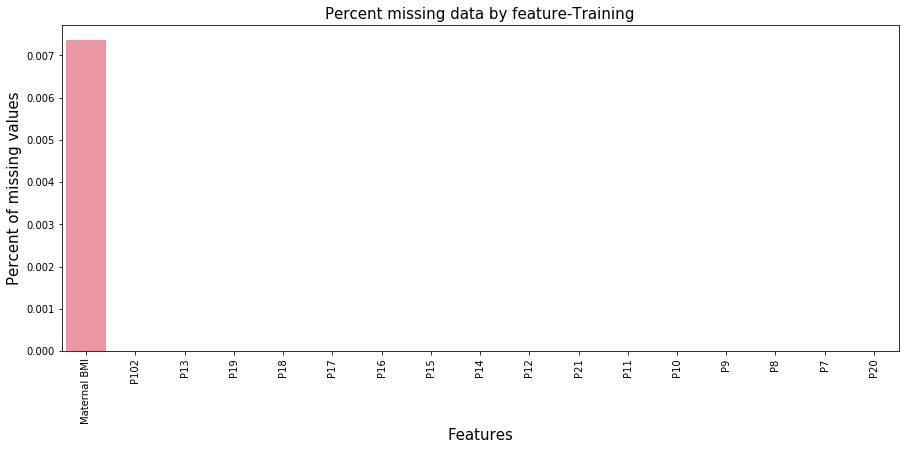

In [22]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_training.index, y=missing_data_training['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature-Training', fontsize=15)
missing_data_training.head()

- __Production__: the top 3 variables with most null values:

,Total,Percent
Maternal BMI,2,0.013333
History of cervical surgery,1,0.006667
Polyhydramnios,1,0.006667
Uterine Malformation,1,0.006667
P102,0,0.000000


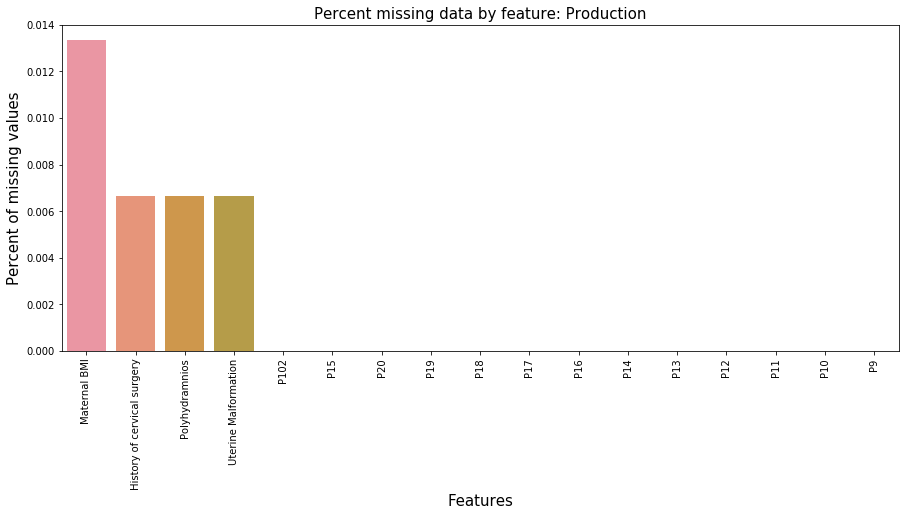

In [23]:
total_null_prod = pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_prod.index, y=missing_data_prod['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature: Production', fontsize=15)
missing_data_prod.head()

#### Note:
- the top 17 features with highest & missing data.

### <font color='red'>2: Data Pre-process:</font>

#### 2.1: Fill the null values in T & P data:

In [24]:
list_top_null = list(missing_data_training.index)

for item in list_top_null:
    pd_frame_training[item].fillna(pd_frame_training[item].mode()[0], inplace=True)

#### -  No null in training data after fill in the missing values with the most common value :

In [25]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_training.head()

,Total,Percent
P102,0,0.0
P5,0,0.0
P7,0,0.0
P8,0,0.0
P9,0,0.0


#### Fill the na in prod:

In [26]:
list_top_null = list(missing_data_prod.index)

for item in list_top_null:
    pd_frame_production[item].fillna(pd_frame_production[item].mode()[0], inplace=True)

#### -  No null in production data with >60% missing percent, after fill in the missing values with the most common value.

In [27]:
total_null_prod= pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_prod.head()

,Total,Percent
P102,0,0.0
P37,0,0.0
P7,0,0.0
P8,0,0.0
P9,0,0.0


#### 2.2: Encoding:

- __Training, production dataset:__ Convert string values in columns except for target into numerical.

In [28]:
from sklearn import preprocessing

In [29]:
le = preprocessing.LabelEncoder()

In [30]:
def encoding_df(df):
    for col in df:
        if col!=target and df[col].dtype=='O':
           #print(col)
            df[col]=le.fit_transform(df[col])

In [31]:
# Encode training data:
encoding_df(pd_frame_training)

In [32]:
# Encode prod data:
encoding_df(pd_frame_production)

#### 2.3: Convert to h2oframe:

#### Training data conversion:

In [33]:
frame_training = h2o.H2OFrame(pd_frame_training)
frame_production = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
print(frame_training['Gestational Category at Delivery'].types)
print(frame_training['Maternal Age at Recruitment / 1st Sample'].types)
print(frame_training['Short Cervix (< 25 mm)'].types)
#print(frame_training['Central Asian'].types) # Updated 08052019: Remove feature 'Central Asian'.

{'Gestational Category at Delivery': 'enum'}
{'Maternal Age at Recruitment / 1st Sample': 'real'}
{'Short Cervix (< 25 mm)': 'int'}


In [35]:
frame_training.head(2)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222


In [36]:
frame_production.head(2)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697


-------------------------------------------------------
### <font color = 'red'>Session 2 preprocess Conclusion:</font>
- __Fill the null values in T & P data:__  
    No more columns with >50% missing data values.  
- __Convert the text values to integer codes.__
-------------------------------------------------------

### <font color='red'>Session 3: Models training and generate leaderboard.</font>

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

#### 3.1: Get independent variables on Training data:

In [37]:
from h2o.automl import H2OAutoML
import time

In [38]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [39]:
#frame_training_drop_SeqNo = h2o.H2OFrame(pd_frame_training_cp)
X=get_independent_variables(frame_training, target) 
print(X)

['Gravidity', 'Parity', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)', 'Cervical change seen during speculum examination', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Maternal Age at Recruitment / 1st Sample', 'Maternal BMI', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 

#### 3.2: Get the best models with parameters:

In [40]:
#Set the run time for auto training limitation.
run_time=1500

In [41]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [42]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training, )

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### 3.3: Retrive the learderboard of the best models:

- The best models are trained by h2o. Shown as the table below:

In [43]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_20190807_124005_model_2,0.803091,0.474712,0.416667,0.326558,0.10664
DeepLearning_grid_1_AutoML_20190807_124005_model_11,0.800403,0.605976,0.5,0.356718,0.127248
DeepLearning_grid_1_AutoML_20190807_124005_model_19,0.778226,1.25226,0.5,0.374096,0.139948
DeepLearning_grid_1_AutoML_20190807_124005_model_14,0.761425,0.607006,0.5,0.317857,0.101033
DeepLearning_grid_1_AutoML_20190807_124005_model_8,0.758737,0.382814,0.5,0.3021,0.0912645
DeepLearning_grid_1_AutoML_20190807_124005_model_12,0.744624,0.490999,0.5,0.315657,0.0996393
DeepLearning_grid_1_AutoML_20190807_124005_model_6,0.736895,0.888525,0.5,0.374219,0.14004
DeepLearning_grid_1_AutoML_20190807_124005_model_13,0.715726,1.66599,0.5,0.339407,0.115197
DeepLearning_grid_1_AutoML_20190807_124005_model_7,0.713038,0.507355,0.5,0.305391,0.0932639
DeepLearning_grid_1_AutoML_20190807_124005_model_10,0.697581,0.702852,0.5,0.317238,0.10064


#### 3.4: Get the best algorithm of model:

In [44]:
best_model_1 = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model_1.model_id)

The algorithm of best model:  DeepLearning_grid_1_AutoML_20190807_124005_model_2


The <font color='red'> {{best_model_1.model_id}} </font> should be the best model to fit training data.

#### 3.5: Get the parameters of this best deeplearning model:

In [45]:
best_model_1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190807_124005_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190807_124005_model_2'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__upload_96b760bdfbf3d9d4f944e425042d48f9.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__upload_96b760bdfbf3d9d4f944e425042d48f9.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment'

- Check the details of this best model:

In [46]:
best_model_1

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190807_124005_model_2


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 4.901189869114276e-05
RMSE: 0.00700084985492067
LogLoss: 0.002009310613832248
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.9838709677419355
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.936680350367153: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9366804,1.0,118.0
max f2,0.9366804,1.0,118.0
max f0point5,0.9366804,1.0,118.0
max accuracy,0.9366804,1.0,118.0
max precision,1.0000000,1.0,0.0
max recall,0.9366804,1.0,118.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9366804,1.0,118.0
max min_per_class_accuracy,0.9366804,1.0,118.0
max mean_per_class_accuracy,0.9366804,1.0,118.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,0.9999999,1.0967742,1.0967742,1.0,0.9999999,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,0.9999998,1.0967742,1.0967742,1.0,0.9999999,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,0.9999989,1.0967742,1.0967742,1.0,0.9999995,1.0,0.9999997,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,0.9999928,1.0967742,1.0967742,1.0,0.9999959,1.0,0.9999984,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,0.9999855,1.0967742,1.0967742,1.0,0.9999886,1.0,0.9999960,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,0.9999583,1.0967742,1.0967742,1.0,0.9999760,1.0,0.9999896,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,0.9998648,1.0967742,1.0967742,1.0,0.9999207,1.0,0.9999721,0.1129032,0.4435484,9.6774194,9.6774194




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.10664036710472125
RMSE: 0.32655836707198493
LogLoss: 0.47471211783346473
Mean Per-Class Error: 0.21370967741935476
AUC: 0.8030913978494624
pr_auc: 0.9459591553055375
Gini: 0.6061827956989247
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.006173952233099368: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),2.0,10.0,0.8333,(10.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,2.0,134.0,0.0735,(10.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0061740,0.9612403,128.0
max f2,0.0061740,0.9841270,128.0
max f0point5,0.2232176,0.9433962,122.0
max accuracy,0.0061740,0.9264706,128.0
max precision,1.0000000,1.0,0.0
max recall,0.0061740,1.0,128.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.0061740,0.3927198,128.0
max min_per_class_accuracy,0.9949510,0.6774194,81.0
max mean_per_class_accuracy,0.9995078,0.7862903,65.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 88.99 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,0.9999999,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,0.9999998,1.0967742,1.0967742,1.0,0.9999998,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,0.9999997,1.0967742,1.0967742,1.0,0.9999998,1.0,0.9999999,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,0.9999989,1.0967742,1.0967742,1.0,0.9999993,1.0,0.9999996,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,0.9999977,1.0967742,1.0967742,1.0,0.9999984,1.0,0.9999992,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,0.9999921,1.0967742,1.0967742,1.0,0.9999953,1.0,0.9999982,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,0.9999603,1.0967742,1.0967742,1.0,0.9999817,1.0,0.9999930,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,0.9998668,1.0967742,1.0967742,1.0,0.9999140,1.0,0.9999729,0.1129032,0.4435484,9.6774194,9.6774194



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9412698,0.0125431,0.9285714,0.962963,0.9259259,0.962963,0.9259259
auc,0.8324028,0.0200679,0.8269231,0.8461539,0.8478261,0.8611111,0.78
err,0.0587302,0.0125431,0.0714286,0.0370370,0.0740741,0.0370370,0.0740741
err_count,1.6,0.3464102,2.0,1.0,2.0,1.0,2.0
f0point5,0.9509458,0.0105313,0.942029,0.9701493,0.9349593,0.9677419,0.9398496
f1,0.9687117,0.0068180,0.962963,0.9811321,0.9583333,0.9795919,0.9615384
f2,0.9872217,0.0028270,0.9848485,0.9923664,0.982906,0.9917355,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.4739966,0.1049558,0.5713153,0.2897445,0.5942842,0.2965211,0.6181176
max_per_class_error,0.7666667,0.2054805,1.0,1.0,0.5,0.3333333,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-07 12:41:32,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-07 12:41:32,56.931 sec,12710 obs/sec,10.0,1,1360.0,0.2500256,0.2552132,0.2229589,0.9254032,0.9842143,1.0967742,0.0661765
,2019-08-07 12:41:37,1 min 1.974 sec,25660 obs/sec,970.0,97,131920.0,0.0070008,0.0020093,0.9993908,1.0,0.9838710,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Antepartum Haemorrhage,1.0,1.0,0.0106601
P24,0.9549538,0.9549538,0.0101799
Maternal GDM,0.9083101,0.9083101,0.0096827
Maternal BMI,0.9038614,0.9038614,0.0096353
P89,0.9011536,0.9011536,0.0096064
---,---,---,---
P65,0.6035773,0.6035773,0.0064342
P88,0.5976421,0.5976421,0.0063709
Current Smoker,0.5948983,0.5948983,0.0063417
P17,0.5891786,0.5891786,0.0062807



See the whole table with table.as_data_frame()


In [47]:
best_model_2 = h2o.get_model(aml.leaderboard[1,'model_id'])
print('The algorithm of best model: ', best_model_2.algo)

The algorithm of best model:  deeplearning


In [48]:
best_model_2

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190807_124005_model_11


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03628200032769355
RMSE: 0.19047834608609335
LogLoss: 0.16304901589175402
Mean Per-Class Error: 0.024193548387096753
AUC: 0.9932795698924731
pr_auc: 0.7251557920467018
Gini: 0.9865591397849462
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0009613673310683803: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),9.0,3.0,0.25,(3.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,9.0,127.0,0.0221,(3.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0009614,0.9880478,73.0
max f2,0.0009614,0.9951846,73.0
max f0point5,0.0941542,0.9902597,69.0
max accuracy,0.0941542,0.9779412,69.0
max precision,1.0000000,1.0,0.0
max recall,0.0009614,1.0,73.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.0941542,0.8687186,69.0
max min_per_class_accuracy,0.5763995,0.9516129,64.0
max mean_per_class_accuracy,0.5763995,0.9758065,64.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 86.42 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,0.9999999,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,0.9999997,1.0967742,1.0967742,1.0,0.9999999,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.12724793704400195
RMSE: 0.3567182880705753
LogLoss: 0.6059760761489071
Mean Per-Class Error: 0.22177419354838712
AUC: 0.8004032258064516
pr_auc: 0.8963119703671283
Gini: 0.6008064516129032
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00017157703686562832: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0001716,0.9538462,111.0
max f2,0.0001716,0.9810127,111.0
max f0point5,0.0092116,0.9355828,107.0
max accuracy,0.0092116,0.9117647,107.0
max precision,1.0000000,1.0,0.0
max recall,0.0001716,1.0,111.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9888650,0.3681741,78.0
max min_per_class_accuracy,0.9958137,0.75,71.0
max mean_per_class_accuracy,0.9888650,0.7782258,78.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 88.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,0.9999999,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,0.9999998,1.0967742,1.0967742,1.0,0.9999999,1.0,0.9999999,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,0.9999990,1.0967742,1.0967742,1.0,0.9999994,1.0,0.9999998,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,0.9999968,1.0967742,1.0967742,1.0,0.9999979,1.0,0.9999992,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,0.9999732,1.0184332,1.0768328,0.9285714,0.9999888,0.9818182,0.9999965,0.1048387,0.4354839,1.8433180,7.6832845



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9190476,0.0197121,0.9285714,0.962963,0.8888889,0.8888889,0.9259259
auc,0.8101776,0.1047890,0.8846154,0.9615384,0.8369565,0.5277778,0.84
err,0.0809524,0.0197121,0.0714286,0.0370370,0.1111111,0.1111111,0.0740741
err_count,2.2,0.5291503,2.0,1.0,3.0,3.0,2.0
f0point5,0.9370977,0.0143898,0.942029,0.9701493,0.9243697,0.9090909,0.9398496
f1,0.956596,0.0114977,0.962963,0.9811321,0.9361702,0.9411765,0.9615384
f2,0.9770705,0.0108503,0.9848485,0.9923664,0.9482759,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.607091,0.2965409,0.4554577,0.0725137,0.7291697,1.3344512,0.4438628
max_per_class_error,0.9,0.1414214,1.0,1.0,0.5,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-07 12:48:30,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-07 12:48:32,2 min 28.351 sec,588 obs/sec,10.0,1,1360.0,0.3681795,0.5650173,-0.6849770,0.9012097,0.9810751,1.0967742,0.0661765
,2019-08-07 12:48:40,2 min 35.535 sec,587 obs/sec,40.0,4,5440.0,0.3172715,0.3879877,-0.2512300,0.9805108,0.9577375,1.0967742,0.0220588
,2019-08-07 12:48:47,2 min 42.556 sec,593 obs/sec,70.0,7,9520.0,0.1958134,0.2039746,0.5233939,0.9677419,0.5288924,1.0967742,0.0441176
,2019-08-07 12:48:53,2 min 48.535 sec,559 obs/sec,90.0,9,12240.0,0.2471282,0.2467974,0.2408642,0.9825269,0.6111042,1.0967742,0.0220588
,2019-08-07 12:48:59,2 min 55.420 sec,571 obs/sec,120.0,12,16320.0,0.2860879,0.3175979,-0.0173580,0.9872312,0.7971037,1.0967742,0.0220588
,2019-08-07 12:49:06,3 min 2.134 sec,582 obs/sec,150.0,15,20400.0,0.1712138,0.1170950,0.6356217,0.9973118,0.9029677,1.0967742,0.0147059
,2019-08-07 12:49:09,3 min 4.451 sec,585 obs/sec,160.0,16,21760.0,0.1904783,0.1630490,0.5490108,0.9932796,0.7251558,1.0967742,0.0220588


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
B7,1.0,1.0,0.0084108
P54,0.9914738,0.9914738,0.0083391
P99,0.9885545,0.9885545,0.0083146
P29,0.9875361,0.9875361,0.0083060
Have any previous pregnancies had an antepartum haemorrhage?(?50ml),0.9834884,0.9834884,0.0082720
---,---,---,---
P5,0.8893650,0.8893650,0.0074803
P87,0.8877031,0.8877031,0.0074663
P94,0.8823790,0.8823790,0.0074215
P19,0.8819148,0.8819148,0.0074176



See the whole table with table.as_data_frame()


In [49]:
best_model_3 = h2o.get_model(aml.leaderboard[2,'model_id'])
print('The algorithm of best model: ', best_model_3.algo)

The algorithm of best model:  deeplearning


In [50]:
best_model_3

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190807_124005_model_19


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.021763867782244924
RMSE: 0.14752582073062642
LogLoss: 0.17908730808057696
Mean Per-Class Error: 0.012096774193548376
AUC: 0.9919354838709676
pr_auc: 0.2976518700175863
Gini: 0.9838709677419353
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.010999552445254036: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),11.0,1.0,0.0833,(1.0/12.0)
Term,1.0,123.0,0.0081,(1.0/124.0)
Total,12.0,124.0,0.0147,(2.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0109996,0.9919355,37.0
max f2,0.0109996,0.9919355,37.0
max f0point5,0.9167731,0.9950658,34.0
max accuracy,0.0109996,0.9852941,37.0
max precision,1.0000000,1.0,0.0
max recall,0.0000001,1.0,47.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.0109996,0.9086022,37.0
max min_per_class_accuracy,0.9167731,0.9758065,34.0
max mean_per_class_accuracy,0.9167731,0.9879032,34.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 89.14 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.2647059,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.2903226,0.2903226,9.6774194,9.6774194
,2,0.3161765,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0,0.0564516,0.3467742,9.6774194,9.6774194
,3,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0967742,0.4435484,9.6774194,9.6774194
,4,0.5,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.5483871,9.6774194,9.6774194
,5,0.6029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.6612903,9.6774194,9.6774194
,6,0.6985294,0.9999978,1.0967742,1.0967742,1.0,0.9999995,1.0,0.9999999,0.1048387,0.7661290,9.6774194,9.6774194
,7,0.8014706,0.9994886,1.0967742,1.0967742,1.0,0.9998927,1.0,0.9999862,0.1129032,0.8790323,9.6774194,9.6774194
,8,0.8970588,0.2406332,1.0124069,1.0877842,0.9230769,0.9318446,0.9918033,0.9927252,0.0967742,0.9758065,1.2406948,8.7784241
,9,1.0,0.0000000,0.2350230,1.0,0.2142857,0.0084644,0.9117647,0.8914042,0.0241935,1.0,-76.4976959,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.13994780011059282
RMSE: 0.3740959771376763
LogLoss: 1.2522630959016074
Mean Per-Class Error: 0.2056451612903225
AUC: 0.7782258064516129
pr_auc: 0.31357371325889855
Gini: 0.5564516129032258
Confusion Matrix (Act/Pred) for max f1 @ threshold = 3.014469630039589e-08: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0000000,0.9538462,47.0
max f2,0.0000000,0.9810127,47.0
max f0point5,0.9998049,0.9420290,18.0
max accuracy,0.0000271,0.9117647,45.0
max precision,0.9999997,0.9782609,4.0
max recall,0.0000000,1.0,47.0
max specificity,1.0000000,0.8333333,0.0
max absolute_mcc,0.9998049,0.4076728,18.0
max min_per_class_accuracy,0.9999990,0.75,7.0
max mean_per_class_accuracy,0.9998049,0.7943548,18.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 90.49 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1102941,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.1209677,0.1209677,9.6774194,9.6774194
,2,0.1544118,1.0000000,0.9139785,1.0445469,0.8333333,1.0000000,0.9523810,1.0,0.0403226,0.1612903,-8.6021505,4.4546851
,3,0.2132353,1.0000000,1.0967742,1.0589544,1.0,1.0000000,0.9655172,1.0000000,0.0645161,0.2258065,9.6774194,5.8954394
,4,0.3014706,1.0000000,1.0967742,1.0700236,1.0,1.0000000,0.9756098,1.0000000,0.0967742,0.3225806,9.6774194,7.0023603
,5,0.4044118,1.0000000,1.0967742,1.0768328,1.0,1.0000000,0.9818182,1.0000000,0.1129032,0.4354839,9.6774194,7.6832845
,6,0.5,1.0000000,1.0967742,1.0806452,1.0,1.0000000,0.9852941,1.0000000,0.1048387,0.5403226,9.6774194,8.0645161
,7,0.6029412,1.0000000,1.0184332,1.0700236,0.9285714,1.0000000,0.9756098,1.0000000,0.1048387,0.6451613,1.8433180,7.0023603
,8,0.6985294,0.9999991,1.0124069,1.0621392,0.9230769,0.9999997,0.9684211,1.0000000,0.0967742,0.7419355,1.2406948,6.2139219
,9,0.8014706,0.9996854,0.9400922,1.0464635,0.8571429,0.9999097,0.9541284,0.9999884,0.0967742,0.8387097,-5.9907834,4.6463451
,10,0.8970588,0.7248043,0.6749380,1.0068747,0.6153846,0.9548267,0.9180328,0.9951761,0.0645161,0.9032258,-32.5062035,0.6874669



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9190476,0.0348082,0.9285714,1.0,0.8518519,0.8888889,0.9259259
auc,0.8338289,0.0830965,0.8846154,1.0,0.8586956,0.6458333,0.78
err,0.0809524,0.0348082,0.0714286,0.0,0.1481482,0.1111111,0.0740741
err_count,2.2,0.9380832,2.0,0.0,4.0,3.0,2.0
f0point5,0.9337664,0.0286815,0.942029,1.0,0.8778626,0.9090909,0.9398496
f1,0.9571356,0.0187735,0.962963,1.0,0.92,0.9411765,0.9615384
f2,0.9822193,0.0078839,0.9848485,1.0,0.9663866,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,1.2578582,0.7749851,0.4969268,0.2986853,1.7355987,3.2032418,0.5548384
max_per_class_error,0.8,0.2828427,1.0,0.0,1.0,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-07 12:54:11,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-07 12:54:13,2 min 42.476 sec,650 obs/sec,9.4558824,1,1286.0,0.2461044,0.4857795,0.2471409,0.9065860,0.5458567,1.0967742,0.0441176
,2019-08-07 12:54:19,2 min 48.142 sec,865 obs/sec,47.3161765,5,6435.0,0.2128656,0.3114348,0.4367699,0.9805108,0.4739596,1.0967742,0.0367647
,2019-08-07 12:54:25,2 min 54.106 sec,978 obs/sec,94.4191176,10,12841.0,0.1475258,0.1790873,0.7294728,0.9919355,0.2976519,1.0967742,0.0147059


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Have any previous pregnancies had an antepartum haemorrhage?(?50ml),1.0,1.0,0.0122212
Maternal BMI,0.8665811,0.8665811,0.0105907
Uterine Malformation,0.8617811,0.8617811,0.0105320
Maternal GDM,0.8462948,0.8462948,0.0103428
Gestational Age at Collection,0.8354349,0.8354349,0.0102100
---,---,---,---
P72,0.5784976,0.5784976,0.0070700
P47,0.5743101,0.5743101,0.0070188
P79,0.5714129,0.5714129,0.0069834
P50,0.5697719,0.5697719,0.0069633



See the whole table with table.as_data_frame()


In [51]:
# AUC of cross-validated holdout predictions based on training data:
print('best_model_1 AUC:', best_model_1.auc(), 'best_model_1 Cross validate AUC: ', best_model_1.auc(xval=True))
print('best_model_2 AUC:', best_model_2.auc(), 'best_model_2 Cross validate AUC: ', best_model_2.auc(xval=True))
print('best_model_3 AUC:', best_model_3.auc(), 'best_model_3 Cross validate AUC: ', best_model_3.auc(xval=True))

best_model_1 AUC: 1.0 best_model_1 Cross validate AUC:  0.8030913978494624
best_model_2 AUC: 0.9932795698924731 best_model_2 Cross validate AUC:  0.8004032258064516
best_model_3 AUC: 0.9919354838709676 best_model_3 Cross validate AUC:  0.7782258064516129


### <font color='red'>Session 3 Model Training Conclusions:</font>  
- The best model is:   
   <font color='red'>1. {{best_model_1.model_id}}</font>: AUC on training data: {{best_model_1.auc()}}, Cross-validate AUC: {{best_model_1.auc(xval=True)}}   
   <font color='red'>2. {{best_model_2.model_id}}</font> : AUC on training data:  {{best_model_2.auc()}}, Cross-validate AUC: {{best_model_2.auc(xval=True)}}  
   <font color='red'>3. {{best_model_3.model_id}}</font>: AUC on training data:  {{best_model_3.auc()}}, Cross-validate AUC: {{best_model_3.auc(xval=True)}} 
   
<>

----------------------------------------------------------

### <font color='red'>Session 4: Interpretability </font>

#### 4.1: Retrive the variable importance of training dataset based on the best model.

- __Based on top 1 best model, these variables are most important to influence the result.__

In [52]:
matrix_VI_1=best_model_1.varimp(True)
matrix_VI_1.iloc[0:10]
#matrix_VI[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,Antepartum Haemorrhage,1.000000,1.000000,0.010660
1,P24,0.954954,0.954954,0.010180
2,Maternal GDM,0.908310,0.908310,0.009683
3,Maternal BMI,0.903861,0.903861,0.009635
4,P89,0.901154,0.901154,0.009606
5,Maternal Age at Recruitment / 1st Sample,0.901062,0.901062,0.009605
6,Gestational Age at Collection,0.884049,0.884049,0.009424
7,B3,0.851224,0.851224,0.009074
8,P12,0.850469,0.850469,0.009066
9,P55,0.843789,0.843789,0.008995


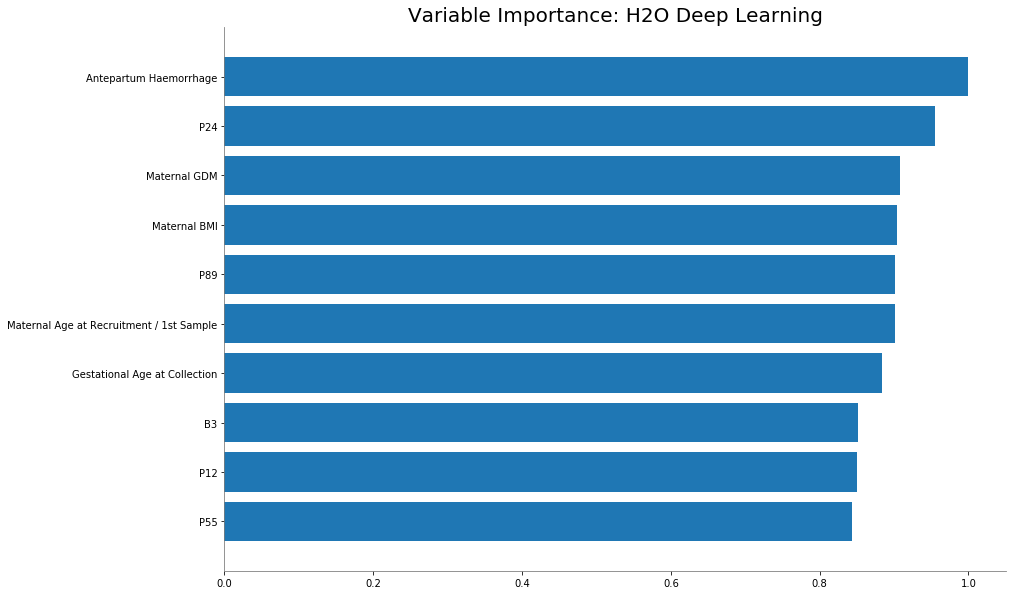

In [53]:
best_model_1.varimp_plot(10)

#### 4.2 Retrive the most important variables based on the 2nd best model:

- __Based on 2nd best model, these variables are most important to influence the result.__

In [54]:
matrix_VI_2=best_model_2.varimp(True)
matrix_VI_2.iloc[0:10]

,variable,relative_importance,scaled_importance,percentage
0,B7,1.000000,1.000000,0.008411
1,P54,0.991474,0.991474,0.008339
2,P99,0.988555,0.988555,0.008315
3,P29,0.987536,0.987536,0.008306
4,Have any previous pregnancies had an antepartu...,0.983488,0.983488,0.008272
5,P22,0.976375,0.976375,0.008212
6,P2,0.973769,0.973769,0.008190
7,P40,0.972851,0.972851,0.008182
8,Cervical change seen during speculum examination,0.968294,0.968294,0.008144
9,P7,0.967408,0.967408,0.008137


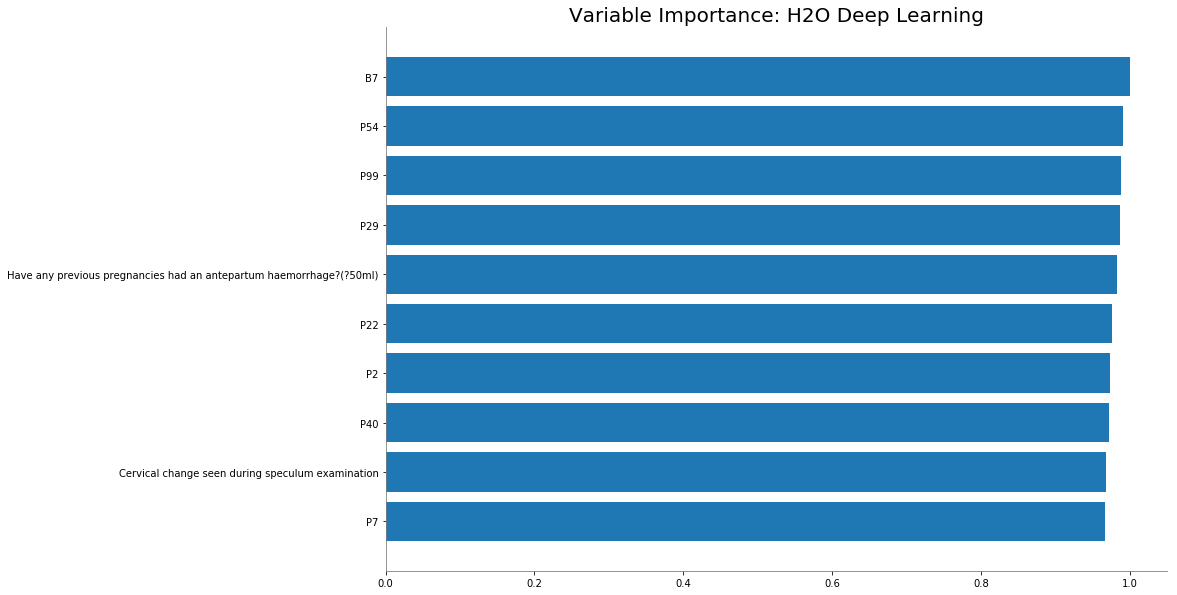

In [55]:
best_model_2.varimp_plot(10)

#### 4.3 Retrive the important variables based on 3rd best model:

- The top 10 most important variables based on model3：

In [56]:
matrix_VI_3=best_model_3.varimp(True)
matrix_VI_3.iloc[0:10]
#matrix_VI_3[matrix_VI['relative_importance']>1.0]

,variable,relative_importance,scaled_importance,percentage
0,Have any previous pregnancies had an antepartu...,1.000000,1.000000,0.012221
1,Maternal BMI,0.866581,0.866581,0.010591
2,Uterine Malformation,0.861781,0.861781,0.010532
3,Maternal GDM,0.846295,0.846295,0.010343
4,Gestational Age at Collection,0.835435,0.835435,0.010210
5,Maternal Age at Recruitment / 1st Sample,0.758351,0.758351,0.009268
6,Cervical change seen during speculum examination,0.739602,0.739602,0.009039
7,Placenta Previa,0.735240,0.735240,0.008986
8,P16,0.732408,0.732408,0.008951
9,Antepartum Haemorrhage,0.729923,0.729923,0.008921


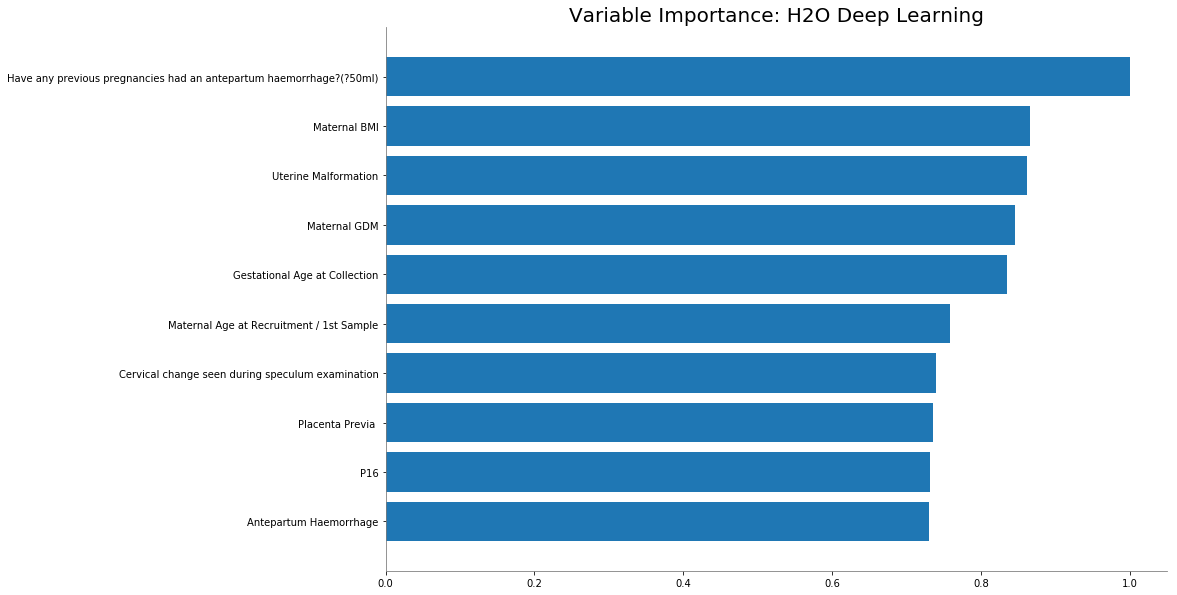

In [57]:
best_model_3.varimp_plot(10)

### <font color='red'>**(Optional) Session 5 'Partial dependence plot' on some top important features. </font>

#### The PDP plot shows:
   - Whether the relationship between the target and a feature(cervical_beaking here) is linear, monotonic or more complex.
   - How this feature(cervical_beaking here) influences the prediction on average.  

#### 5.1: Retrive the PDP of top 1 important variable.

In [58]:
variable_top1 = [(matrix_VI_1.iloc[:,0])[0]]
print('The most important variable: ', variable_top1)

The most important variable:  ['Antepartum Haemorrhage']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


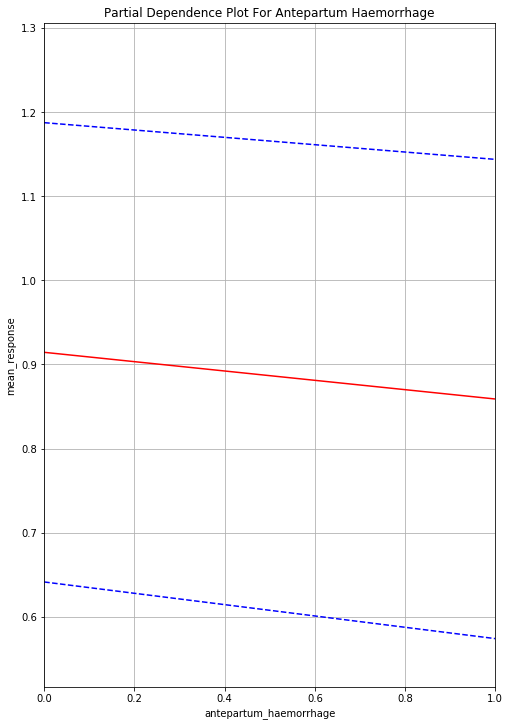

In [59]:
pdp_helpfulness = best_model_1.partial_plot(frame_training, cols = variable_top1)

##### How does {{variable_top1}} influence the response/target?
   - <font color='red'>Negative linear correlation</font> between {{variable_top1}} and the mean_response;  
   - Variable_top1 =  <font color='red'>'Have any previous pregnancies had an antepartum haemorrhage50ml?'</font>

#### 5.2: Retrive the PDP: the most important variable in 2nd best model.

In [60]:
variable_top2 = [(matrix_VI_2.iloc[:,0])[0]]
print('The most important variable: ', variable_top2)

The most important variable:  ['B7']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


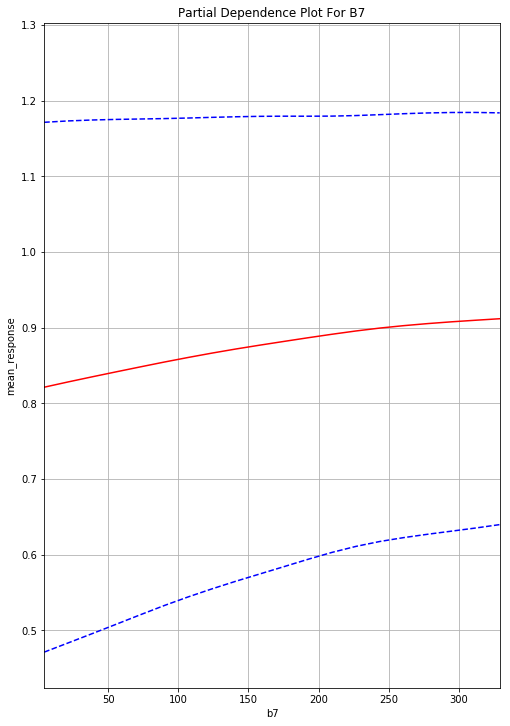

In [61]:
pdp_helpfulness_2 = best_model_2.partial_plot(frame_training, cols = variable_top2)

##### How {{variable_top2}} influence the target/response?
  - __Trend:__ 
      - <font color='red'>1. Sharply decrease after {{variable_top2}} reaches around 900.</font>
      - <font color='red'>2. Go flatten after 1500.</font>
  - variable_top2=<font color='red'>'B5'</font>

#### 5.3: Retrive the PDP: the most important variable in 3rd best model.

In [62]:
variable_top3 = [(matrix_VI_3.iloc[:,0])[0]]
print('The most important variable: ', variable_top3)

The most important variable:  ['Have any previous pregnancies had an antepartum haemorrhage?(?50ml)']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


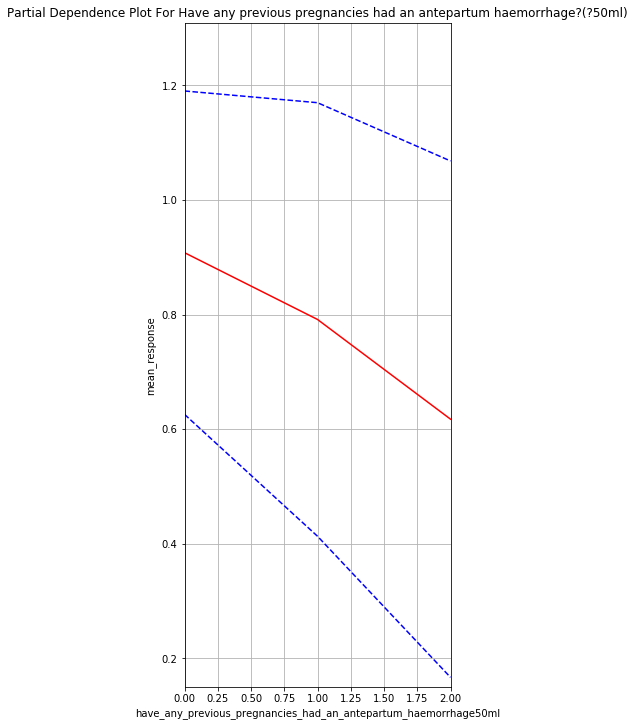

In [63]:
pdp_helpfulness_3 = best_model_3.partial_plot(frame_training, cols = variable_top3)

##### How {{variable_top3}} influence target/response?
   - __Trend:__
       - <font color='red'>Strongly negative correlation between the {{variable_top3}} and the target.</font>
   - variable_top3 =<font color='red'>'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)'</font>

### <font color='red'>Session 6. Predictions and save to .csv:</font>

#### 6.1: Store the score/performance of each best model to .csv:

In [124]:
model_path = 'output/Models/models_'+str(calendar.timegm(time.gmtime()))+'_info.csv'
aml.leaderboard.as_data_frame()[0:10].to_csv(model_path)
print('Done. Model information wrote to: ', model_path)

Done. Model information wrote to:  output/Models/models_1565200175_info.csv


#### 6.2: Predict with these top 10 models and save to 10 .csv:

In [64]:
# Convert panda dataframe to h2oframe.
frame_production_preprocessed = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [125]:
for i in range(0, 10):
    #Predict by this model:
    pred_prod_temp = best_model_temp.predict(frame_production_preprocessed)
    
    #Concat with No.Id.
    pd_pred_prod_temp = pred_prod_temp.as_data_frame()
    seqNo_df_3 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
    res_seqno_prediction = pd.concat([seqNo_df_3,pd_pred_prod_temp],axis=1,ignore_index = True)
    
    #Save prediction to csv
    pred_path='output/Features_Removed/Prediction/model'+str(i)+'_'+best_model_temp.model_id+'_prediction.csv'
    res_seqno_prediction.to_csv(pred_path)
    print('Done. Prediction wrote to: ', pred_path)

deeplearning prediction progress: |███████████████████████████████████████| 100%
Done. Prediction wrote to:  output/Features_Removed/Prediction/model0_DeepLearning_grid_1_AutoML_20190807_124005_model_2_prediction.csv
deeplearning prediction progress: |███████████████████████████████████████| 100%
Done. Prediction wrote to:  output/Features_Removed/Prediction/model1_DeepLearning_grid_1_AutoML_20190807_124005_model_2_prediction.csv
deeplearning prediction progress: |███████████████████████████████████████| 100%
Done. Prediction wrote to:  output/Features_Removed/Prediction/model2_DeepLearning_grid_1_AutoML_20190807_124005_model_2_prediction.csv
deeplearning prediction progress: |███████████████████████████████████████| 100%
Done. Prediction wrote to:  output/Features_Removed/Prediction/model3_DeepLearning_grid_1_AutoML_20190807_124005_model_2_prediction.csv
deeplearning prediction progress: |███████████████████████████████████████| 100%
Done. Prediction wrote to:  output/Features_Removed

In [80]:
#h2o.remove_all()
#h2o.shutdown()